<a href="https://colab.research.google.com/github/SondipPoulSingh/Deep-Learning/blob/main/Gradient_Descent_in_Action.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Read the GD Algorithm first<br>


In [ ]:
from sklearn.datasets import make_regression

In [ ]:
# importing a simple regression dataset
X,y = make_regression( n_samples = 15, n_features = 1, n_informative = 1,
                      n_targets = 1,noise=10, random_state = 83)

In [ ]:
X # showing the input and output

array([[-1.08056649],
       [ 0.09447164],
       [-1.12274722],
       [-1.03965701],
       [ 1.42993841],
       [-0.46482673],
       [-0.98450391],
       [ 1.06177198],
       [-0.57823174],
       [ 1.14308469],
       [-0.66538354],
       [ 0.67497599],
       [ 1.11757542],
       [ 0.84931289],
       [-0.3771686 ]])

In [ ]:
y

array([-47.3975475 ,   0.5839787 , -51.65592031, -56.30543186,
        69.42631394, -10.03026498, -49.17460787,  63.82073075,
       -35.50975707,  57.90062129, -20.70993044,  18.28553862,
        38.75200393,  35.85118215, -18.54613536])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

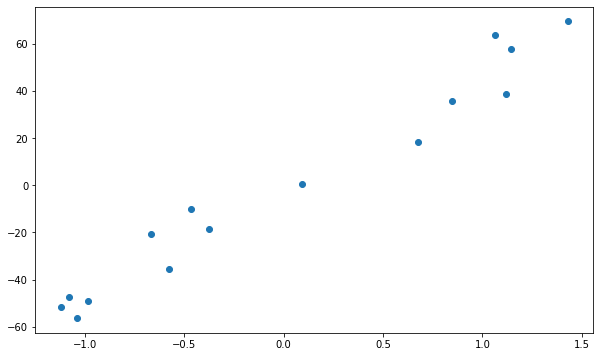

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.show()

#### Linear Regression model from sklearn<br>
##### As m is fixed, we will take the value and tries to find proper b with our GD algorithm 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lreg = LinearRegression()
lreg.fit(X,y)

LinearRegression()

In [ ]:
print(f'm = {lreg.coef_}')
print(f'b = {lreg.intercept_}')

m = [46.42197217]
b = -0.4935883537411853


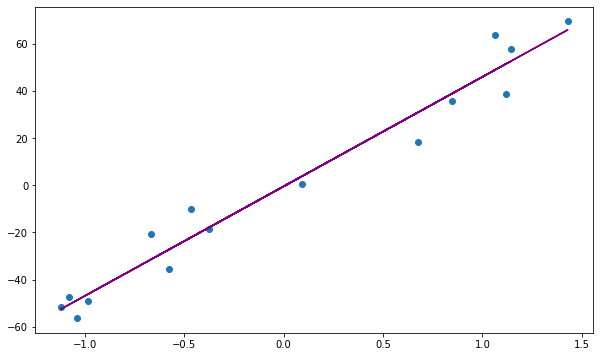

In [ ]:
m = lreg.coef_ #coef_ return all the weights found by sklearn's linear regression model
b = lreg.intercept_ #intercept_ return the bias value
y_pred = lreg.predict(X)
#print(y_pred)

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,y_pred,color='purple')
plt.show()

#### Gradient Descent Algorithm in action<br>

##### m = [46.42197217] b = -0.4935883537411853 (Actual values from sklearn)<br>
###### *As we consider m is known at first we take m = [46.42197217] and try to find the correct value of b by using GD Algorithm*

[-20.16202743  34.38555982 -22.12014006 -18.26292864  96.38056112
   8.42182629 -15.70261332  79.28954936   3.15734218  83.06424579
  -0.88841605  61.33371642  81.88005502  69.42677916  12.49108965]


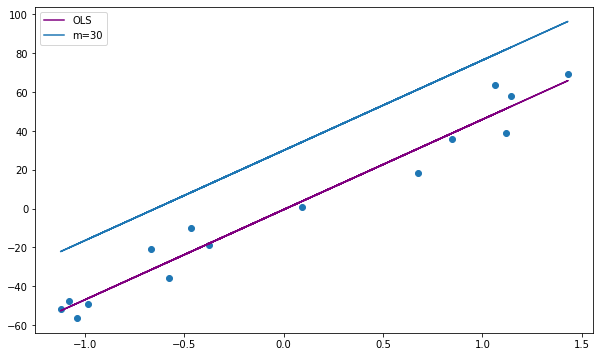

In [ ]:
m = 46.42197217
b = 30 # Take a random value
y_pred_new = (m*X.ravel()+b) # prediction for the value
print(y_pred_new)

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,y_pred,color='purple', label='OLS') # Actual line from sklearn
plt.plot(X,y_pred_new, label='m=30')# our models predicted line
plt.legend()
plt.show()

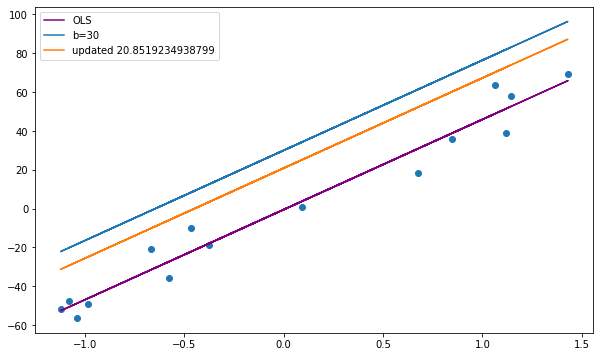

In [ ]:
## Running the same code for the 2nd time and we can see improvement
### The line move from blue to the orange line
### See the value changes of b in the figure below

lr = 0.01
#slope = -2*np.sum(y-m*X-b)
slope = -2*np.sum(y-m*X.ravel()-b)
b = b - lr*slope

y_pred_newest = m*X+b

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,y_pred,color='purple', label='OLS')
plt.plot(X,y_pred_new, label='b=30')
plt.plot(X,y_pred_newest, label=f'updated {b}')
plt.legend()
plt.show()

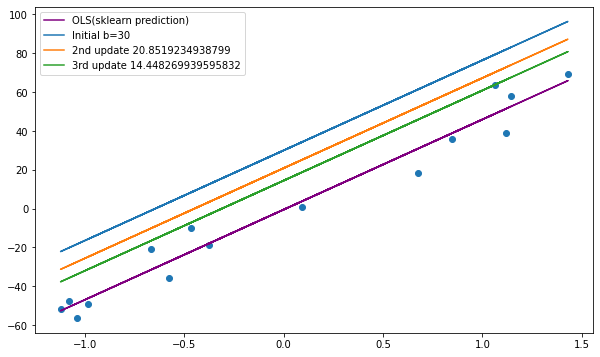

In [ ]:
lr = 0.01
#slope = -2*np.sum(y-m*X-b)
slope = -2*np.sum(y-m*X.ravel()-b)
b_last = b - lr*slope

y_pred_newest_last = m*X+b_last

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,y_pred,color='purple', label='OLS(sklearn prediction)')
plt.plot(X,y_pred_new, label='Initial b=30')
plt.plot(X,y_pred_newest, label=f'2nd update {b}')
plt.plot(X,y_pred_newest_last, label=f'3rd update {b_last}')
plt.legend()
plt.show()

#### Visualize how the loss look like and how GD performing for minimizing the loss

In [ ]:
all_b = np.arange(-20,20,0.5) #random values of b from -20 to 20
loss = [] # it will store the losses for every b,loss is a list
for b in all_b:
  loss.append(np.power(np.sum(y-m*X.ravel()-b),2)) # I use OLS here (y-y_hat)^2 or (y-mx-b)^2

In [ ]:
loss = np.array(loss) # converting loss list to numpy array to plot

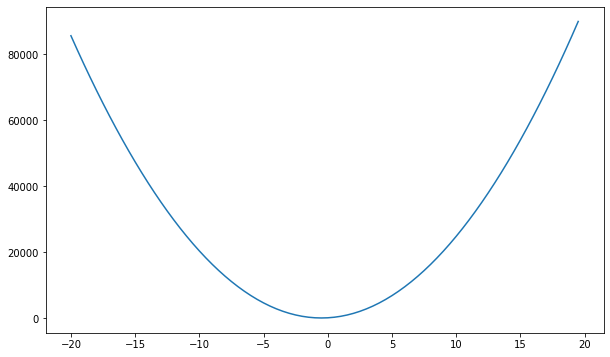

In [ ]:
# this shows how are loss function looks like
plt.figure(figsize=(10,6))
plt.plot(all_b,loss)
plt.show()

##### Final GD algorithm when m is known 
##### Look how each time the line updates towards the Actual Red line and How loss minimized by GD algorithm(Second plot)

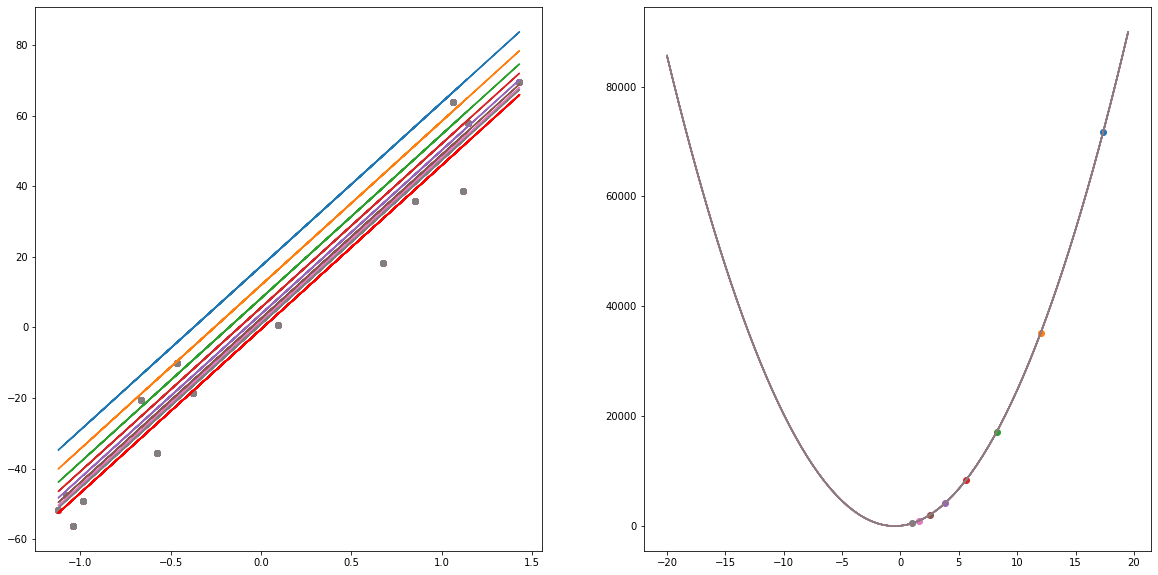

In [ ]:
m = lreg.coef_   # lr.coef_  from above algorithm
b  = 25
lrate = 0.01
slope = -2*np.sum(y-m*X.ravel()-b)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))


for i in range(8):
    slope = -2*np.sum(y-m*X.ravel()-b)
    b = b - lrate*slope
    l = np.power(np.sum(y-m*X.ravel()-b),2) # loss
    y_pred_newest = m*X.ravel()+b
    ax1.plot(X,y_pred_newest)
    ax1.scatter(X,y)
    ax1.plot(X,lreg.predict(X),color='red', label='OLS') # Actaul line
    ax2.plot(all_b,loss)
    ax2.scatter(b,l)
  
plt.show()

##### Actual GD algorithm When both b and m is unknown

In [ ]:
#For both m and b

In [ ]:
from sklearn.datasets import make_regression

In [ ]:
X,y = make_regression(n_samples = 100, n_features = 1,  n_informative = 1, 
                      n_targets = 1,noise=10, random_state = 13)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

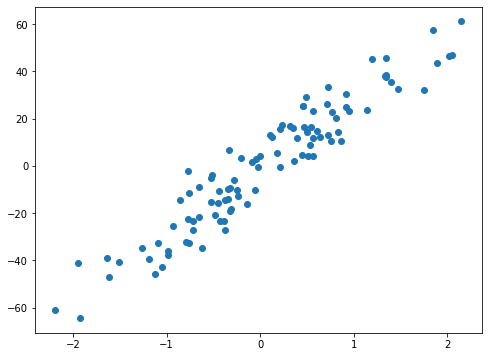

In [ ]:
plt.scatter(X,y)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression 

In [ ]:
lreg = LinearRegression()
lreg.fit(X,y)

LinearRegression()

In [ ]:
m = lreg.coef_
b = lreg.intercept_
print(f'm={m} b={b}')
line = m*X.reshape(100)+b
print(line[0:2])

m=[27.71819977] b=-1.1473722793384897
[-20.89355896 -13.26426289]


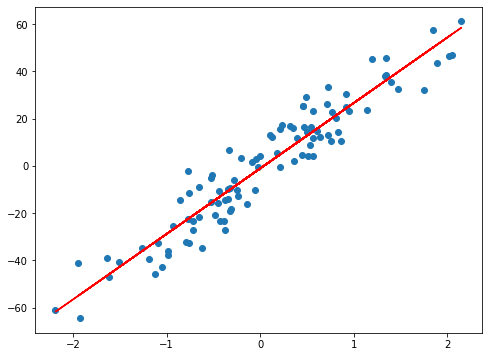

In [ ]:
plt.scatter(X,y)
plt.plot(X,lreg.predict(X),color='red')
plt.show()

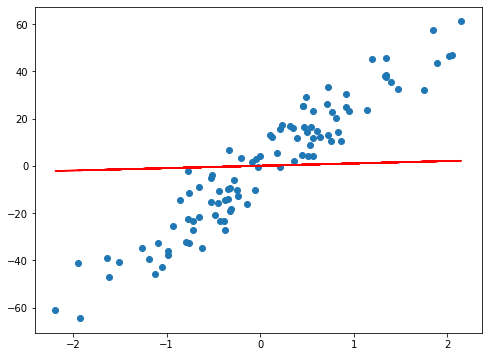

In [ ]:
# we and the same m and b by our algorithm
# m=[27.71819977] b=-1.1473722793384897

m = 1
b = 0
initial_line=(m*X+b).reshape(100)
plt.scatter(X,y)
plt.plot(X,initial_line,color='red')
plt.show()

In [ ]:
# Initial values
m = -56
b = 10
lr = 0.001
for i in range(10000):
  slope_b = -2*np.sum(y-m*X.ravel()-b)
  slope_m = -2*np.sum((y-m*X.ravel()-b)*X.ravel())
  b = b - lr*slope_b
  m = m - lr*slope_m

print(f'm:{lreg.coef_}   b:{lreg.intercept_}')
print(f'm:{m}   b:{b}')

m:[27.71819977]   b:-1.1473722793384897
m:27.718199765142987   b:-1.1473722793384886


In [ ]:
#Some Aniamtion
from matplotlib.animation import FuncAnimation

In [ ]:
# Initial values
m = 100
b = -45
lr = 0.001

all_b = []
all_m = []

for i in range(100):
  slope_b = -2*np.sum(y-m*X.ravel()-b)
  slope_m = -2*np.sum((y-m*X.ravel()-b)*X.ravel())
  b = b - lr*slope_b
  m = m - lr*slope_m
  all_b.append(b)
  all_m.append(m)

print(f'm:{lreg.coef_}   b:{lreg.intercept_}')
print(f'm:{m}   b:{b}')

m:[27.71819977]   b:-1.1473722793384897
m:27.718200403957788   b:-1.147372528650443


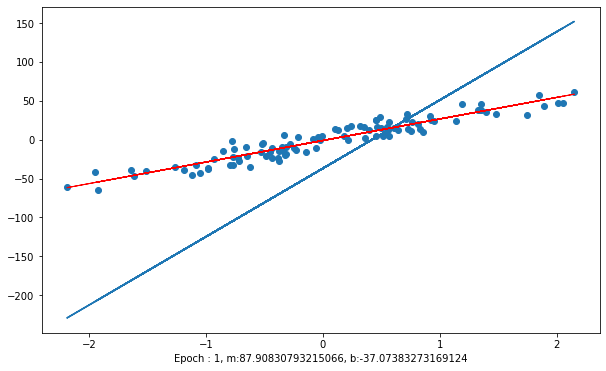

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
# slope_b = -2*np.sum(y-all_m[0]*X.ravel()-all_b[0])
# slope_m = -2*np.sum((y-all_m[0]*X.ravel()-all_b[0])*X.ravel())
line, = ax.plot(X,X*all_m[0]+all_b[0])
ax.scatter(X,y)
ax.plot(X, lreg.predict(X), color='red',linewidth=1)

def update(i):
  # slope_b = -2*np.sum(y-all_m[i]*X.ravel()-all_b[i])
  # slope_m = -2*np.sum((y-all_m[i]*X.ravel()-all_b[i])*X.ravel())
  line.set_ydata(X*all_m[i]+all_b[i])
  line.set_label(f'b:{all_b[i]} m:{all_m[i]}')
  ax.set_xlabel(f'Epoch : {i+1}, m:{all_m[i]}, b:{all_b[i]}')

anim = FuncAnimation(fig,update,frames=25,interval=300)
plt.show()

In [ ]:
from matplotlib import rc # https://stackoverflow.com/questions/61103994/embedding-matplotlib-animations-in-python-google-colab-notebook
rc('animation', html='jshtml')
anim

In [ ]:
anim

#### Trying to plot a 3D loss

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
np.random.seed(83)
x = np.random.normal(3,1,50) #mean, std, size
y = np.random.normal(3,1,50) #peak, flatness, size
z = np.random.normal(3,1,50)

In [ ]:
x[0:5],y[0:5]

(array([3.84931289, 1.87725278, 4.14308469, 3.67497599, 2.53517327]),
 array([2.56561395, 2.38851345, 3.28123298, 3.77017387, 3.28525277]))

matplotlibrc configuration files are used to customize all kinds of properties in matplotlib. One can change the rc settings to customize the default parameters e.g:

matplotlib.rcParams['font.family'] = 'times new roman'

In [ ]:
plt.rcParams['figure.figsize'] = (8,6)

3D plotting Scatter Plot

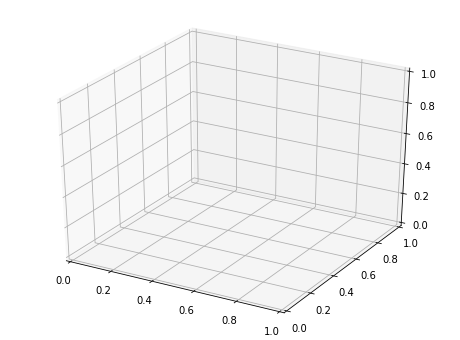

In [ ]:
plt.axes(projection='3d')
#Axes object is the region of the image with the data space. A given figure can
#contain many Axes, but a given Axes object can only be in one Figure

Text(0.5, 0, 'z')

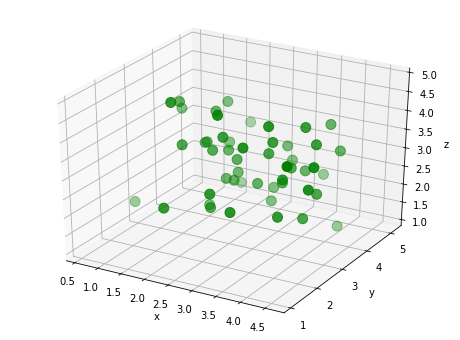

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter(x,y,z,s=100,color='green') #ax.plot3D for lines
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

3D surface plot 

In [ ]:
x = np.linspace(-5,5,50)
y = np.linspace(-5,5,50)

def find_z(X,Y):
  return 50+(X**2+y**2)

In [ ]:
X, Y = np.meshgrid(x,y)
Z = find_z(X,Y)

In [ ]:
X.shape,Y.shape, Z.shape

((50, 50), (50, 50), (50, 50))

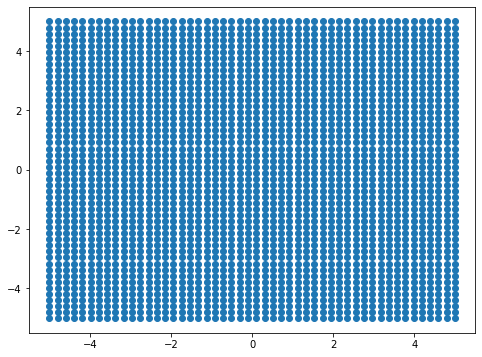

In [ ]:
plt.scatter(X,Y)

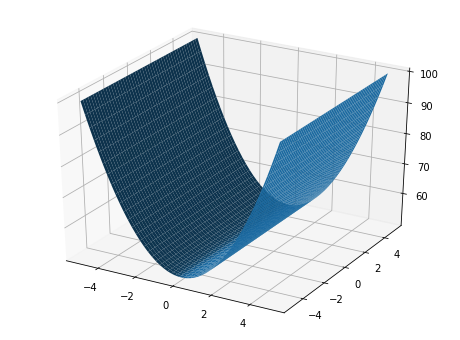

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z)

Now try to plot our loss plot

In [ ]:
from sklearn.datasets import make_regression 
X,y = make_regression(n_samples = 40, n_features = 1,  n_informative = 1, 
                      n_targets = 1,noise=10, random_state = 13)

In [ ]:
x = np.linspace(-25,25,40)
y = np.linspace(-25,25,40)


In [ ]:
m,b=np.meshgrid(x,y)

In [ ]:
loss=[]
for mm,bb in zip(m,b):
  loss.append(np.power(np.sum(y-mm*X.ravel()-bb),2))

In [ ]:
m.shape

(40, 40)

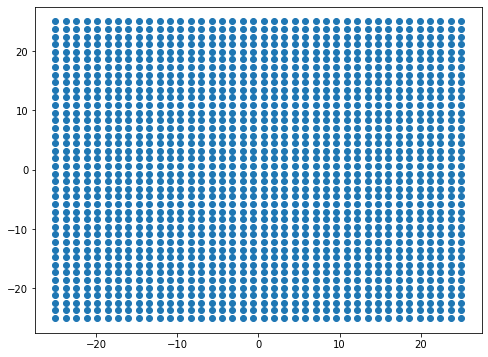

In [ ]:
plt.scatter(m,b)

In [ ]:
loss = np.array(loss)
loss = np.meshgrid(loss,loss)
loss = loss[0]


((40, 40), (40, 40), (40, 40))

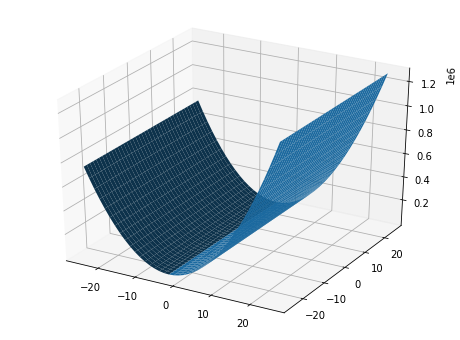

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(m,b,loss)
m.shape,b.shape,loss.shape

In [ ]:
# Initial values
mm = 20
bb = -1
lr = 0.01

all_b = []
all_m = []
losses = []

for i in range(100):
  slope_b = -2*np.sum(y-mm*X.ravel()-b)
  slope_m = -2*np.sum((y-mm*X.ravel()-bb)*X.ravel())
  loss_mb = np.power(np.sum(y-mm*X.ravel()-bb),2)
  bb = bb - lr*slope_b
  mm = mm - lr*slope_m
  all_b.append(bb)
  all_m.append(mm)
  losses.append(loss_mb)

In [ ]:
from matplotlib import cm

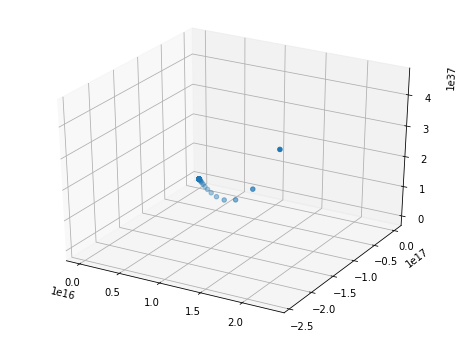

In [ ]:
ax = plt.axes(projection='3d') # to work in 3d
ax.scatter(all_m,all_b,losses) #ax.plot3D for lines
ax.plot_surface(m,b,loss,cmap=cm.hot)


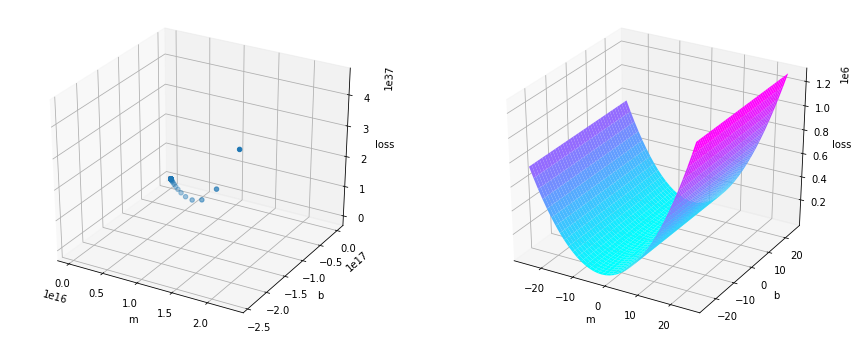

In [ ]:
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(all_m,all_b,losses) #ax.plot3D for lines

ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('loss')



ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(m,b,loss,cmap=cm.cool)
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('loss')

plt.show()